#  Predict the stock prices of Microsoft 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

data = pd.read_csv("data/MSFT.csv")
print(data.head())

         Date        Open        High         Low       Close   Adj Close   
0  2023-03-01  250.759995  250.929993  245.789993  246.270004  244.265244  \
1  2023-03-02  246.550003  251.399994  245.610001  251.110001  249.065857   
2  2023-03-03  252.190002  255.619995  251.389999  255.289993  253.211807   
3  2023-03-06  256.429993  260.119995  255.979996  256.869995  254.778931   
4  2023-03-07  256.299988  257.690002  253.389999  254.149994  252.081085   

     Volume  
0  27565300  
1  24808200  
2  30760100  
3  24109800  
4  21473200  


In this dataset, the Close column contains the values whose future values we want to predict. So let’s have a closer look at the historical close prices of Microsoft’s stock price:

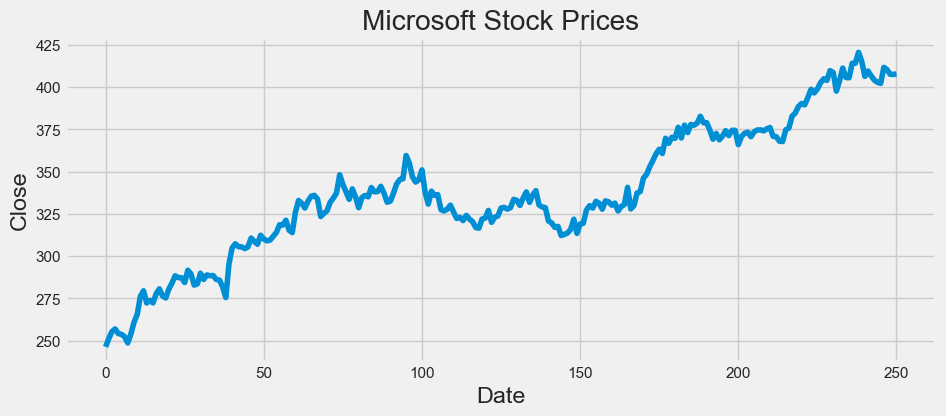

In [5]:

plt.figure(figsize=(10, 4))
plt.title("Microsoft Stock Prices")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

In [18]:
data_no_time = data[[ 'Open', 'High', 'Low', 'Close', 'Adj Close']]

               Open      High       Low     Close  Adj Close
Open       1.000000  0.997738  0.998095  0.995051   0.995103
High       0.997738  1.000000  0.997823  0.997781   0.997726
Low        0.998095  0.997823  1.000000  0.998210   0.998225
Close      0.995051  0.997781  0.998210  1.000000   0.999950
Adj Close  0.995103  0.997726  0.998225  0.999950   1.000000


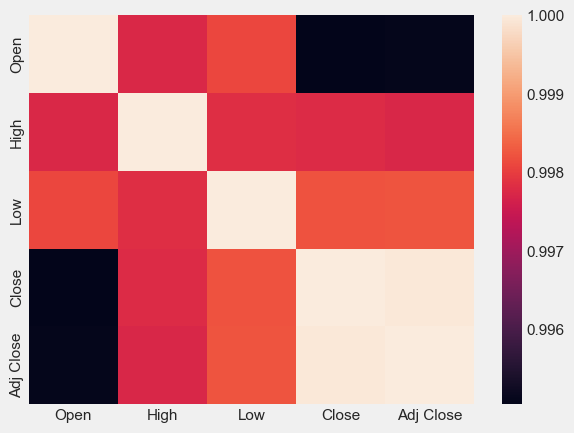

In [19]:
print(data_no_time.corr())
sns.heatmap(data_no_time.corr())
plt.show()

Now I’ll prepare the data to fit into the machine learning model. In this step, I will first add the most important features to x and the target column to y, and then I will divide the dataset into training and test sets:

In [20]:

x = data[["Open", "High", "Low"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
data = pd.DataFrame(data={"Predicted Rate": ypred})
print(data.head())

   Predicted Rate
0      329.910004
1      254.149994
2      328.390015
3      322.929993
4      315.260010
